In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as scikit_learn
import random
from statsmodels.stats.contingency_tables import mcnemar
pd.options.display.max_columns = 250

In [2]:
df = pd.read_csv('./loc.csv') 
df2 = pd.read_csv('./wrcc.csv')
df3 = pd.read_csv('./dist.csv')
i = 0
while i < 20:
    df.replace((' '*i), np.nan, inplace = True)
    i = i+1
df2.head(8)

#df.drop(index=df.index[0], axis=0)

df = df.join(df3,lsuffix='_other')

In [3]:
rad = []

for ra in df['RAJ2000\n"h:m:s"']:
    rad.append(int(ra[0:2]) / 24 * 360 + int(ra[3:5]) / 24 * 360 / 60 + float(ra[6:10]) / 24 * 360 / 3600)
df['rad'] = rad

dec = []
for de in df['DEJ2000\n"d:m:s"']:
    if de[0] == '-':
        a = -1
    else:
        a = 1
    dec.append((int(de[1:3]) + int(de[4:6]) / 60 + float(de[7:11]) / 3600)*a)
df['decd'] = dec
#df = df.join(df2.set_index('Full'), on='Full',lsuffix='_caller', rsuffix='_other')


In [4]:
df

,Full_other,New,WR_other,Name,GCVS,OName,LS,Aname,"RAJ2000\n""h:m:s""","DEJ2000\n""d:m:s""",r_Pos,GLON\ndeg,GLAT\ndeg,r_FC,Name.1,SpType_other,r_,l__other,vmag\nmag_other,u__other,b-v\nmag_other,u_.1_other,r_vmag,vinf\nkm/s,vinf2\nkm/s,r_vinf,l_.1,Per\nd,n_,Binary,r_Per,Full,WR,SpType,l_,vmag\nmag,u_,b-v\nmag,u_.1,(b-v)0\nmag,Av\nmag,Mv(WR)\nmag,dM\nmag,d\nkpc,z\npc,Note,rad,decd
0,1,NaN,1,NaN,NaN,HD 4004,LS I+64 34,HIP 3415,00 43 28.40,+64 45 35.40,Hip,122.08,1.90,VI,HD 4004,WN4,SS96*,NaN,10.51,NaN,0.51,NaN,Ma84,2100.0,NaN,HS92,NaN,6.1000,", 7.746, 11.68",SB1?,"La83,MS86,MMH98,MG99,Ni00",1,1,WN4,NaN,10.51,NaN,0.51,NaN,-0.15,2.72,-3.51,NaN,1.82,60.0,NaN,10.868333,64.759833
1,2,NaN,2,NaN,NaN,HD 6327,LS I+60 137,HIP 5100,01 05 23.03,+60 25 18.90,Hip,124.65,-2.41,VI,HD 6327,WN2,SS96*,NaN,11.33,NaN,0.13,NaN,Ma84,3200.0,NaN,HS92,NaN,18.5900,", 2.171, long term",VB,"Hip97,MMH98",2,2,WN2,NaN,11.33,NaN,0.13,NaN,-0.30,1.75,-2.42,NaN,2.51,-106.0,*,16.345833,60.421917
2,3,NaN,3,NaN,NaN,HD 9974,LS I+57 24,HIP 7681,01 38 55.63,+58 09 22.70,Hip,129.18,-4.14,VI,HD 9974,WN3+O4,SS96*,NaN,10.70,NaN,-0.06,NaN,Ma84,NaN,NaN,NaN,NaN,46.8500,-0.02,SB2,"MLS86,MS86,SH89,SM89,SS96",3,3,WN3+O4,NaN,10.70,NaN,-0.06,NaN,-0.26,0.82,-3.09,-0.27,5.94,-429.0,*,24.731667,58.156306
3,4,NaN,4,NaN,V493 Per,HD 16523,LS I+56 62,HIP 12527,02 41 11.68,+56 43 49.70,Hip,137.59,-2.98,VI,HD 16523,WC5+?,VI,NaN,10.53,NaN,0.20,NaN,Ma84,1900.0,NaN,KH95,NaN,2.4096,", 10:","SB1, no d.e.l.","MS86,CM89,RC89,SS90,t.w.",4,4,WC5+?,NaN,10.53,NaN,0.20,NaN,-0.27,1.93,-3.34,NaN,2.44,-127.0,*,40.298333,56.730472
4,5,NaN,5,NaN,NaN,HD 17638,LS I+56 77,HIP 13380,02 52 11.66,+56 56 07.10,Hip,138.87,-2.15,VI,HD 17638,WC6,VI,NaN,11.02,NaN,0.47,NaN,Ma84,2100.0,NaN,TC86u,NaN,NaN,NaN,NaN,NaN,5,5,WC6,NaN,11.02,NaN,0.47,NaN,-0.32,3.24,-3.63,NaN,1.91,-72.0,*,43.048333,56.935306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,222,NaN,154,NaN,NaN,HD 213049,LS III+55 79,HIP 110836,22 27 17.82,+56 15 11.80,Hip,103.85,-1.18,VI,HD 213049,WC6,VI,NaN,11.54,NaN,0.36,NaN,Ma84,2050.0,NaN,KH95,NaN,NaN,NaN,NaN,NaN,222,154,WC6,NaN,11.54,NaN,0.36,NaN,-0.29,2.65,-3.31,NaN,2.75,-57.0,NaN,336.824167,56.253278
222,223,NaN,155,NaN,CQ Cep,HD 214419,LS III+56 80,HIP 111633,22 36 53.96,+56 54 21.00,Hip,105.32,-1.29,VI,"HD 214419, CQ Cep",WN6+O9II-Ib,SS96*,NaN,8.75,NaN,0.28,NaN,Ma84,1400.0,NaN,EW94,NaN,1.6412,436,SB2,"SB84,MS86,SM89,MM95,HH97,Hip97,MMH98,NG99a",223,155,WN6+O9II-Ib,NaN,8.75,NaN,0.28,NaN,-0.26,2.22,-2.80,-2.79,2.75,-62.0,*,339.224583,56.905833
223,224,NaN,156,AC+60 38562-0,NaN,NaN,LS III+60 30,HIP 113569,23 00 10.13,+60 55 38.40,Hip,109.82,0.92,VI,AC+60 38562,WN8h+OB?,"SS96,t.w.",NaN,11.09,NaN,0.83,NaN,Ma84,660.0,NaN,CS95b,NaN,6.5000,", 10.05, 15",d.e.l.,"MS86,CM89,MMH98,MMEv98,t.w.",224,156,WN8h+OB?,NaN,11.09,NaN,0.83,NaN,-0.27,4.51,-5.48,0.11,3.56,57.0,*,345.042083,60.927333
224,225,NaN,157,NaN,NaN,HD 219460,LS III+60 55,HIP 114791,23 15 12.41,+60 27 01.90,Hip,111.33,-0.24,VI,HD 219460,WN5 (+B1II),SS96*,NaN,9.91,NaN,0.46,NaN,Ma84,1500.0,NaN,HK95,NaN,1.7860,", 2.032",VB,"HH88,Hip97,MMH98,NG99a",225,157,WN5 (+B1II VB),NaN,9.91,NaN,0.46,NaN,-0.25,2.93,-4.07,-1.31,3.39,-14.0,*,348.801667,60.450528


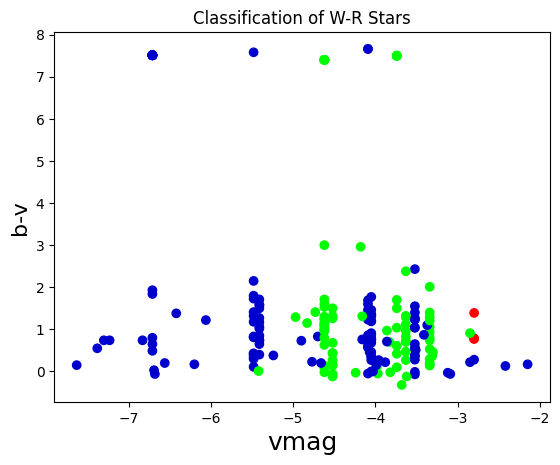

In [5]:
type1 = df['SpType'].tolist()
color = []
spec = []
count = [0,0]
for t in type1:
    if t[1] == 'N':
        color.append('#0000CD')
        spec.append(2)
        
    elif t[1] == 'C':
        color.append('#00FF00')
        spec.append(1)
        
    elif t[1] == 'O':
        color.append('#FF0000')
        spec.append(0)
plt.scatter(df['Mv(WR)\nmag'], df['b-v\nmag'].map(float), c = color)
plt.title('Classification of W-R Stars')
plt.xlabel('vmag', fontsize=18)
plt.ylabel('b-v', fontsize=16)

plt.show()
df['spec']= spec


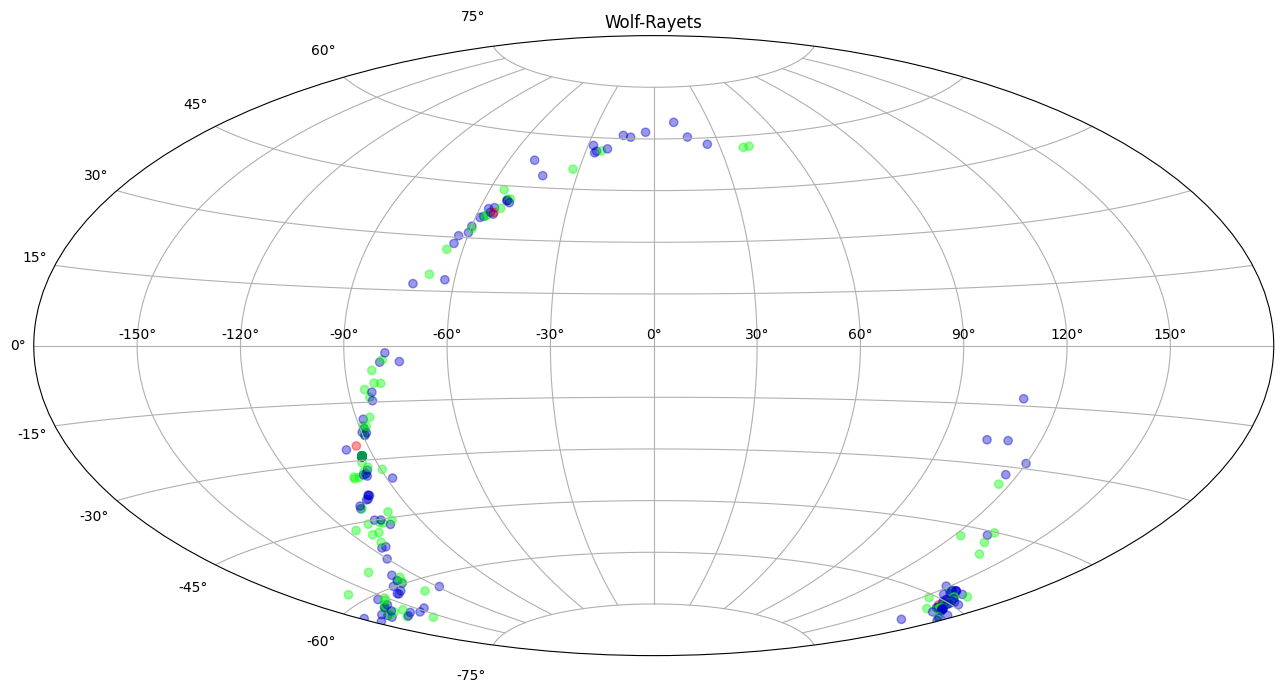

In [6]:
import matplotlib as mpl
df['rad']=df['rad']/180*np.pi
rar=[]
for r in df['rad']:
    if r > np.pi:
        r = r - 2* np.pi
    rar.append(r)


mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure (figsize = (16, 8.4))
plt.subplot (projection = "aitoff")
plt.title ("Wolf-Rayets")
plt.scatter(rar, df['decd']/180*np.pi,marker='o', alpha = 0.4, c = color)
plt.grid (True)

plt.show()

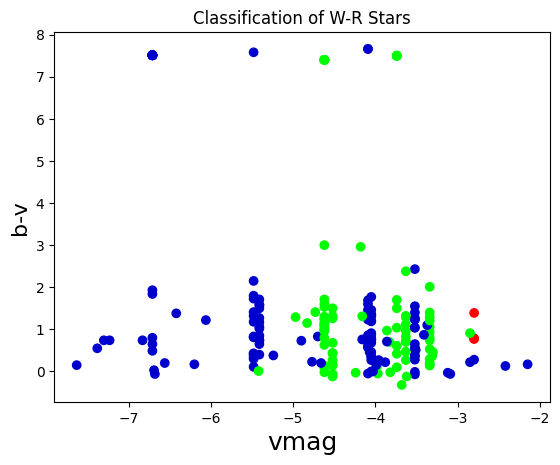

In [7]:
color = []
spec = []
count = [0,0]
for t in type1:
    if t[1] == 'N':
        color.append('#0000CD')
        spec.append(2)
        
    elif t[1] == 'C':
        color.append('#00FF00')
        spec.append(1)
        
    elif t[1] == 'O':
        color.append('#FF0000')
        spec.append(0)
plt.scatter(df['Mv(WR)\nmag'], df['b-v\nmag'].map(float), c = color)
plt.title('Classification of W-R Stars')
plt.xlabel('vmag', fontsize=18)
plt.ylabel('b-v', fontsize=16)

plt.show()
df['spec']= spec


In [8]:
df1 = df[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s','vmag\nmag_other' ]].dropna().map(float)

X = df1.values[:]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 225
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mv(WR)
mag      136 non-null    float64
 1   b-v
mag         136 non-null    float64
 2   vinf
km/s       136 non-null    float64
 3   vmag
mag_other  136 non-null    float64
dtypes: float64(4)
memory usage: 5.3 KB


In [9]:
from sklearn.cluster import KMeans
clusterNum = 2
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0]


In [10]:
df1["Clus_km"] = labels
df1.head(5)

,Mv(WR)\nmag,b-v\nmag,vinf\nkm/s,vmag\nmag_other,Clus_km
0,-3.51,0.51,2100.0,10.51,0
1,-2.42,0.13,3200.0,11.33,1
3,-3.34,0.20,1900.0,10.53,0
4,-3.63,0.47,2100.0,11.02,0
5,-3.52,-0.07,1800.0,6.94,0


In [11]:
df1.groupby('Clus_km')

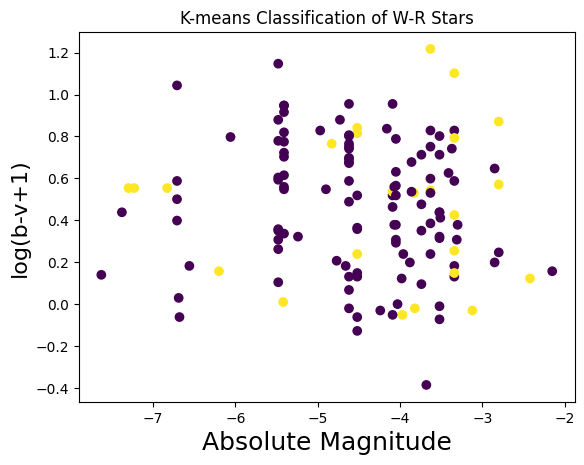

In [12]:
#area = np.pi * ( X[:, 3])**2 / 3 



plt.scatter(X[:, 0], np.log(X[:, 1]+1), c=labels.astype(float))
plt.title('K-means Classification of W-R Stars')
plt.xlabel('Absolute Magnitude', fontsize=18)
plt.ylabel('log(b-v+1)', fontsize=16)

plt.show()

In [13]:

df123= df[['Mv(WR)\nmag','SpType','b-v\nmag','vinf\nkm/s','vmag\nmag_other']].dropna()

type1 = df123['SpType'].tolist()
color = []
spec = []
for t in type1:
    if t[1] == 'N':
        color.append('#0000CD')
        spec.append(0)
    elif t[1] == 'C':
        color.append('#00FF00')
        spec.append(1)
    elif t[1] == 'O':
        color.append('#00FF00')
        spec.append(0)

type1 = df123['SpType'].tolist()

a = 0
b = 0
for t in type1:
    if t[1] == 'N':
        a+=1
    elif t[1] == 'C':
        b+=1
print(a)
print(b)
 




73
61


In [14]:
.85*136




115.6

In [15]:
21/136

0.15441176470588236

In [16]:
from sklearn import metrics
df123.drop('SpType', axis=1, inplace=True)

print(metrics.accuracy_score(spec, k_means.predict(X)))

0.5955882352941176


In [17]:
df123['spec']=spec
y = df123['spec']
X = df123[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, neigh.predict(X_test)))
k_means.fit(X_train)
print(metrics.accuracy_score(y_test, k_means.predict(X_test)))


0.7619047619047619
0.6666666666666666


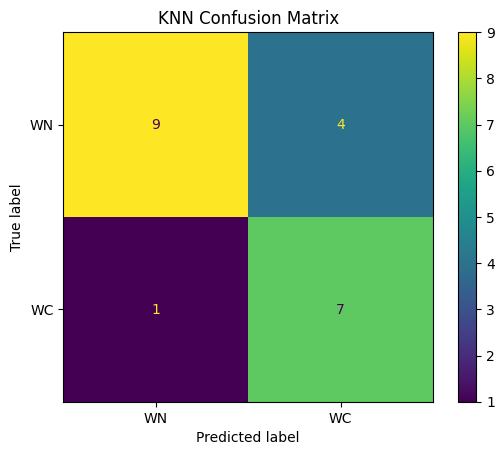

In [18]:
yhat=neigh.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, yhat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["WN", "WC"])

cm_display.plot()
plt.title ("KNN Confusion Matrix")
plt.show()

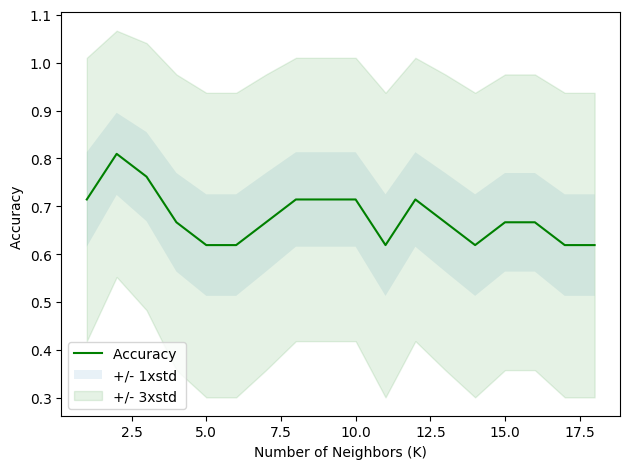

In [19]:
Ks = 19
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,  neigh.predict(X_test)))
print(metrics.classification_report(y_test,neigh.predict(X_test), target_names=["WN", "WC"]))


Train set Accuracy:  0.6695652173913044
Test set Accuracy:  0.6190476190476191
              precision    recall  f1-score   support

          WN       0.86      0.46      0.60        13
          WC       0.50      0.88      0.64         8

    accuracy                           0.62        21
   macro avg       0.68      0.67      0.62        21
weighted avg       0.72      0.62      0.61        21



In [21]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score



ari = adjusted_rand_score(y_test, k_means.predict(X_test))
nmi = normalized_mutual_info_score(y_test, k_means.predict(X_test))

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

Adjusted Rand Index (ARI): 0.05941499085923217
Normalized Mutual Information (NMI): 0.11194890210020678


In [22]:

labels = k_means.predict(X_test)
print(metrics.classification_report(y_test,labels, target_names=["WN", "WC"]))

import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(neigh, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=["Absolute Magnitude", "B-V", "Wind Velocity"])
for name, score in zip(["Absolute Magnitude", "B-V", "Wind Velocity"], perm.feature_importances_):
    print(f"{name}: {score:.4f}")

              precision    recall  f1-score   support

          WN       0.65      1.00      0.79        13
          WC       1.00      0.12      0.22         8

    accuracy                           0.67        21
   macro avg       0.82      0.56      0.51        21
weighted avg       0.78      0.67      0.57        21

Absolute Magnitude: -0.0095
B-V: -0.0190
Wind Velocity: 0.2095


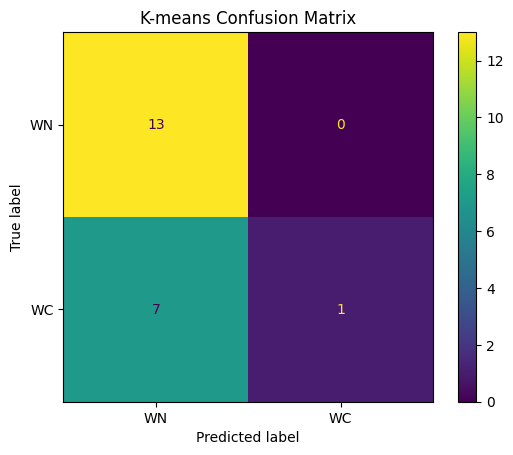

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, k_means.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["WN", "WC"])

cm_display.plot()
plt.title ("K-means Confusion Matrix")
plt.show()


In [24]:






y_true = y_test
y_pred_knn = neigh.predict(X_test)
y_pred_kmeans =  labels
a = 0
b = 0
c = 0
d = 0
for true, pred_knn, pred_kmeans in zip(y_true, y_pred_knn, y_pred_kmeans):
    knn_correct = (pred_knn == true)
    kmeans_correct = (pred_kmeans == true)

    if knn_correct and kmeans_correct:
        a += 1
    elif knn_correct and not kmeans_correct:
        b += 1
    elif not knn_correct and kmeans_correct:
        c += 1
    else:
        d += 1

print(f"Contingency Table: [[{a}, {b}], [{c}, {d}]]")
table = [[a, b],
         [c, d]]
result = mcnemar(table, exact=False)
print(mcnemar(table, exact=False))


Contingency Table: [[7, 6], [7, 1]]
pvalue      1.0
statistic   0.0


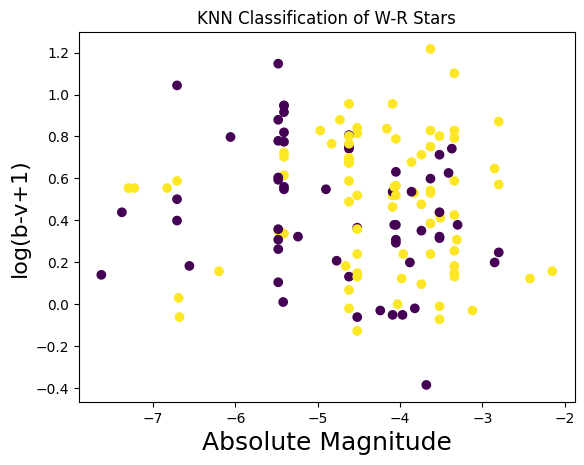

In [25]:

plt.scatter(X['Mv(WR)\nmag'], np.log(X['b-v\nmag']+1), c = neigh.predict(X))
plt.title('KNN Classification of W-R Stars')

plt.xlabel('Absolute Magnitude', fontsize=18)
plt.ylabel('log(b-v+1)', fontsize=16)

plt.show()

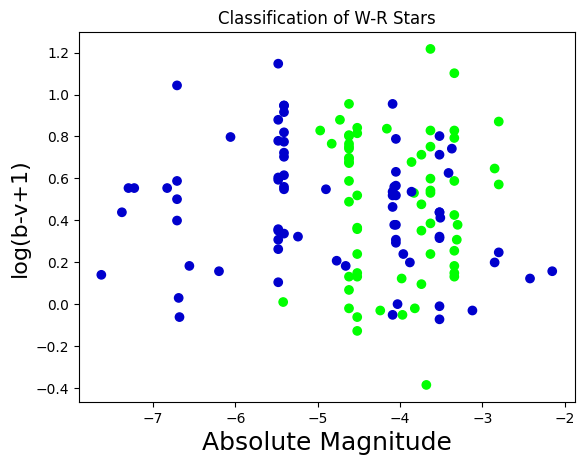

In [26]:

X = df123[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s','vmag\nmag_other']]

plt.scatter(X['Mv(WR)\nmag'], np.log(X['b-v\nmag']+1), c = color)
plt.title('Classification of W-R Stars')
plt.xlabel('Absolute Magnitude', fontsize=18)
plt.ylabel('log(b-v+1)', fontsize=16)
plt.show()

In [27]:
Ks = 19
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71428571, 0.80952381, 0.76190476, 0.66666667, 0.61904762,
       0.61904762, 0.66666667, 0.71428571, 0.71428571, 0.71428571,
       0.61904762, 0.71428571, 0.66666667, 0.61904762, 0.66666667,
       0.66666667, 0.61904762, 0.61904762])

In [28]:
import plotly.express as px

In [29]:
y = df123['spec']
X = df123[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s']]
i=0
acc = []
all_acc = 0
Ks = 25
acc1 = []
while i <100:
    acc = []
    for n in range(1,Ks):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.15, random_state=i)
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        neigh.fit(X_train,y_train)
        acc.append(neigh.score(X_test, y_test)) 
    all_acc = all_acc + max(acc)
    acc1.append(max(acc))
    i = i+1
print(all_acc/100)
print(np.std(acc1))

    

0.7576190476190472
0.07501927190037627


In [30]:
acc2 = []
i = 0
while i <100:
    acc2.append(metrics.accuracy_score(spec, k_means.predict(X)))
    i = i+1
avg = sum(acc2) / len(acc2)
std = np.std(acc2)


In [31]:
from sklearn.dummy import DummyClassifier
i=0
dacc = []
all_acc = 0
Ks = 25
acc1 = []
while i <100:
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.15, random_state=i)
    dummy_clf = DummyClassifier(strategy='constant', constant =0)
    dummy_clf.fit(X_train, y_train)
    dacc.append(dummy_clf.score(X_test, y_test))
    
    i = i+1

sum(dacc)/len(dacc)


0.5538095238095238

In [32]:
y_test

12     0
5      0
135    0
128    0
81     1
21     0
13     1
209    1
115    0
187    1
40     1
91     0
113    0
216    0
220    0
84     0
214    0
213    1
10     0
223    0
207    0
Name: spec, dtype: int64

In [33]:
acc = []
all_acc = 0
Ks = 25
acc1 = []
while i <100:
    acc = []
    for n in range(1,Ks):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.15, random_state=i)
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        neigh.fit(X_train,y_train)
        acc.append(neigh.score(X_test, y_test)) 
    all_acc = all_acc + max(acc)
    acc1.append(max(acc))
    i = i+1
print(all_acc/100)
print(np.std(acc1))

    

0.0
nan


C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


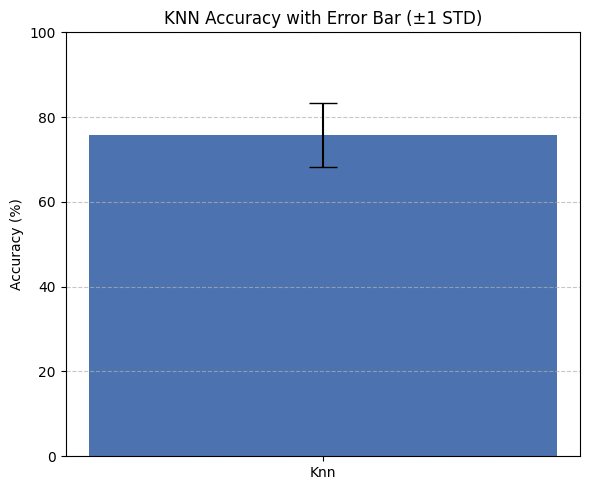

In [34]:
models = "Knn"
plt.figure(figsize=(6, 5))
plt.bar(models, 0.7576190476190472*100, yerr=0.07501927190037627*100, capsize=10, color='#4C72B0')
plt.ylabel('Accuracy (%)')
plt.title('KNN Accuracy with Error Bar (±1 STD)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)



plt.tight_layout()
plt.show()

In [35]:
y = df123['spec']
X = df123[['Mv(WR)\nmag','b-v\nmag','vinf\nkm/s']]
i=0
all_acc = 0
Ks = 25
acc1 = []
while i <1000:
    acc = []
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=i)
    #Train Model and Predict  
    k_means = KMeans(n_clusters = 2)
    k_means.fit(X_train,y_train)
    acc=metrics.accuracy_score(y_test, k_means.predict(X_test))
    all_acc = all_acc + acc

    i = i+1
print(all_acc/1000)


0.5133333333333335


In [36]:
df123.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 225
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mv(WR)
mag      136 non-null    float64
 1   b-v
mag         136 non-null    float64
 2   vinf
km/s       136 non-null    float64
 3   vmag
mag_other  136 non-null    float64
 4   spec            136 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.4 KB
